# 作業4

* 使用車牌號碼的影像資料集，建立辨識車牌中的號碼卷積神經網路之模型，測試集的準確度至少95%以上。

## 01. 建立影像輸入與標籤

In [1]:
from PIL import Image
import numpy as np
import os

# 定義輸入的大小
im_w = 50
im_h = 50

# 影像的維度
d = 1

# 影像的資料夾位置
path = r"Car License Plate Number\Car License Plate Number"

# 讀取資料夾中的檔案名稱
filenames = os.listdir(path)
#print(filenames)

# 建立空陣列輸入(大小為(1800, 50, 50, 1))
data = np.empty((len(filenames), im_w, im_h, d)).astype(np.uint8)
print(data.shape)

# 建立空陣列標籤
label = [0]*len(filenames)
print(len(label))

(1800, 50, 50, 1)
1800


In [3]:
# 0-9的列表
label_name_09 = [str(i) for i in range(10)]
print(label_name_09)

# A-Z的列表
label_name_AZ = [chr(i+65) for i in range(26)]
print(label_name_AZ)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
label_name = label_name_09 + label_name_AZ
print(label_name)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
for i in range(len(filenames)):
    # 塞標籤
    for j in range(len(label_name)):
        if(filenames[i][0] == str(label_name[j])):
            label[i] = j
    # 塞影像
    img = Image.open(path+"/"+filenames[i]).convert('L') # 開啟影像
    reimg = img.resize((im_w, im_h))                     # 改變影像大小
    npimg = np.asarray(reimg, dtype="uint8")             # 改變為陣列並為整數型別
    npimg = np.expand_dims(npimg,-1)                     # 改變影像維度大小
    data[i,:,:,:] = npimg                                # 放入空陣列中

In [6]:
# 匯入sklearn中的train_test_split套件
from sklearn.model_selection import train_test_split 
from collections import Counter 

# 資料分割為訓練與測試集
train_x, test_x, train_y, test_y = train_test_split(data, label, random_state = 0, test_size = 0.2)

# 打印訓練集與測試集數量
print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))
print("訓練集的類別數量:%s" %Counter(train_y))
print("測試集的類別數量:%s" %Counter(test_y))

訓練集數量 1440
測試集數量 360
訓練集的類別數量:Counter({32: 45, 28: 45, 16: 44, 17: 44, 22: 43, 34: 43, 18: 43, 20: 42, 13: 42, 7: 42, 24: 41, 11: 41, 6: 41, 2: 41, 30: 41, 12: 41, 15: 41, 25: 40, 21: 40, 35: 40, 3: 39, 8: 39, 4: 39, 26: 39, 27: 39, 29: 38, 1: 38, 31: 38, 9: 38, 19: 37, 5: 37, 0: 37, 33: 36, 14: 36, 23: 36, 10: 34})
測試集的類別數量:Counter({10: 16, 23: 14, 33: 14, 14: 14, 19: 13, 0: 13, 5: 13, 9: 12, 29: 12, 31: 12, 1: 12, 3: 11, 27: 11, 4: 11, 8: 11, 26: 11, 35: 10, 21: 10, 25: 10, 11: 9, 12: 9, 24: 9, 2: 9, 30: 9, 6: 9, 15: 9, 13: 8, 7: 8, 20: 8, 34: 7, 22: 7, 18: 7, 16: 6, 17: 6, 28: 5, 32: 5})


## 02. 資料處理

In [7]:
from tensorflow.keras.utils import to_categorical

# 將排序型編碼的標籤另存變數，於後算混淆矩陣時會使用到
sort_train_label = train_y
sort_test_label = test_y

# 將排序型編碼轉為獨熱編碼
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


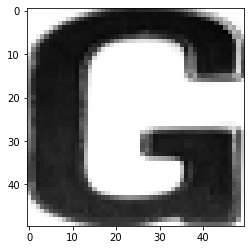

In [8]:
import matplotlib.pyplot as plt
print(train_y[1])
plt.imshow(np.reshape(train_x[1], (50,50)), cmap="gray")
plt.show()

In [9]:
# 正規化與轉換型別
train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255

## 03. 模型訓練

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 建立順序型模型
cnn = Sequential()

# 增加卷積層，並設置濾波器數量及大小、激勵函數、零填充
cnn.add(Conv2D(32,(4,4),activation='relu', padding='same', input_shape=(50,50,1)))
# 增加捨棄層
cnn.add(Dropout(0.2))
# 增加最大池化層
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(128,(2,2),activation='relu', padding='same'))
cnn.add(Dropout(0.2))

# 拉成一維度
cnn.add(Flatten())
# 增加全連接層
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(36, activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)       32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 128)      

In [13]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="my_log_car")

In [15]:
history = cnn.fit(x=train_x, y=train_y, 
                  batch_size=200, epochs=20, 
                  validation_data=(test, callbacks=[tensorboard]_x, test_y), 
                  verbose=1)

Epoch 1/20
8/8 [==============================] - 5s 536ms/step - loss: 3.1029 - acc: 0.2465 - val_loss: 1.6494 - val_acc: 0.6444
Epoch 2/20
8/8 [==============================] - 4s 516ms/step - loss: 0.6657 - acc: 0.8597 - val_loss: 0.3948 - val_acc: 0.9167
Epoch 3/20
8/8 [==============================] - 4s 499ms/step - loss: 0.4101 - acc: 0.9146 - val_loss: 0.3288 - val_acc: 0.9139
Epoch 4/20
8/8 [==============================] - 4s 513ms/step - loss: 0.2080 - acc: 0.9465 - val_loss: 0.1823 - val_acc: 0.9417
Epoch 5/20
8/8 [==============================] - 4s 507ms/step - loss: 0.0872 - acc: 0.9708 - val_loss: 0.1036 - val_acc: 0.9528
Epoch 6/20
8/8 [==============================] - 4s 492ms/step - loss: 0.0623 - acc: 0.9715 - val_loss: 0.0919 - val_acc: 0.9639
Epoch 7/20
8/8 [==============================] - 4s 496ms/step - loss: 0.0491 - acc: 0.9757 - val_loss: 0.1035 - val_acc: 0.9611
Epoch 8/20
8/8 [==============================] - 4s 501ms/step - loss: 0.0566 - acc: 0.97

## 04. 驗證指標

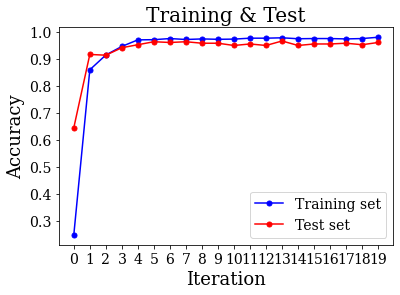

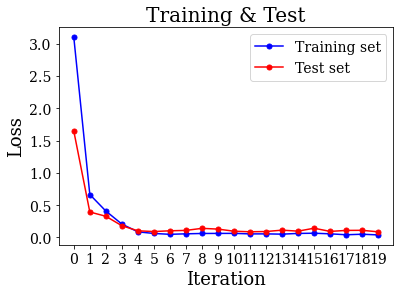

In [16]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

plt.rcParams["font.family"] = "serif"
plt.title("Training & Test", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(test_acc)), test_acc,color='r', label="Test set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

plt.title("Training & Test", fontsize=20)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.plot(np.arange(len(loss)), loss,color='b', label="Training set", marker='o', markersize=5)
plt.plot(np.arange(len(test_loss)), test_loss,color='r', label="Test set", marker='o', markersize=5)
plt.xticks(np.linspace(0,19,20),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [17]:
train_loss, train_acc = cnn.evaluate(train_x, train_y)
print("訓練集的準確度為：%0.4f" %(train_acc))
print("訓練集的損失值為：%0.4f" %(train_loss))

test_loss, test_acc = cnn.evaluate(test_x, test_y)
print("測試集的準確度為：%0.4f" %(test_acc))
print("測試集的損失值為：%0.4f" %(test_loss))

45/45 [==============================] - 1s 16ms/step - loss: 0.0472 - acc: 0.9778
訓練集的準確度為：0.9778
訓練集的損失值為：0.0472
12/12 [==============================] - 0s 15ms/step - loss: 0.0874 - acc: 0.9611
測試集的準確度為：0.9611
測試集的損失值為：0.0874


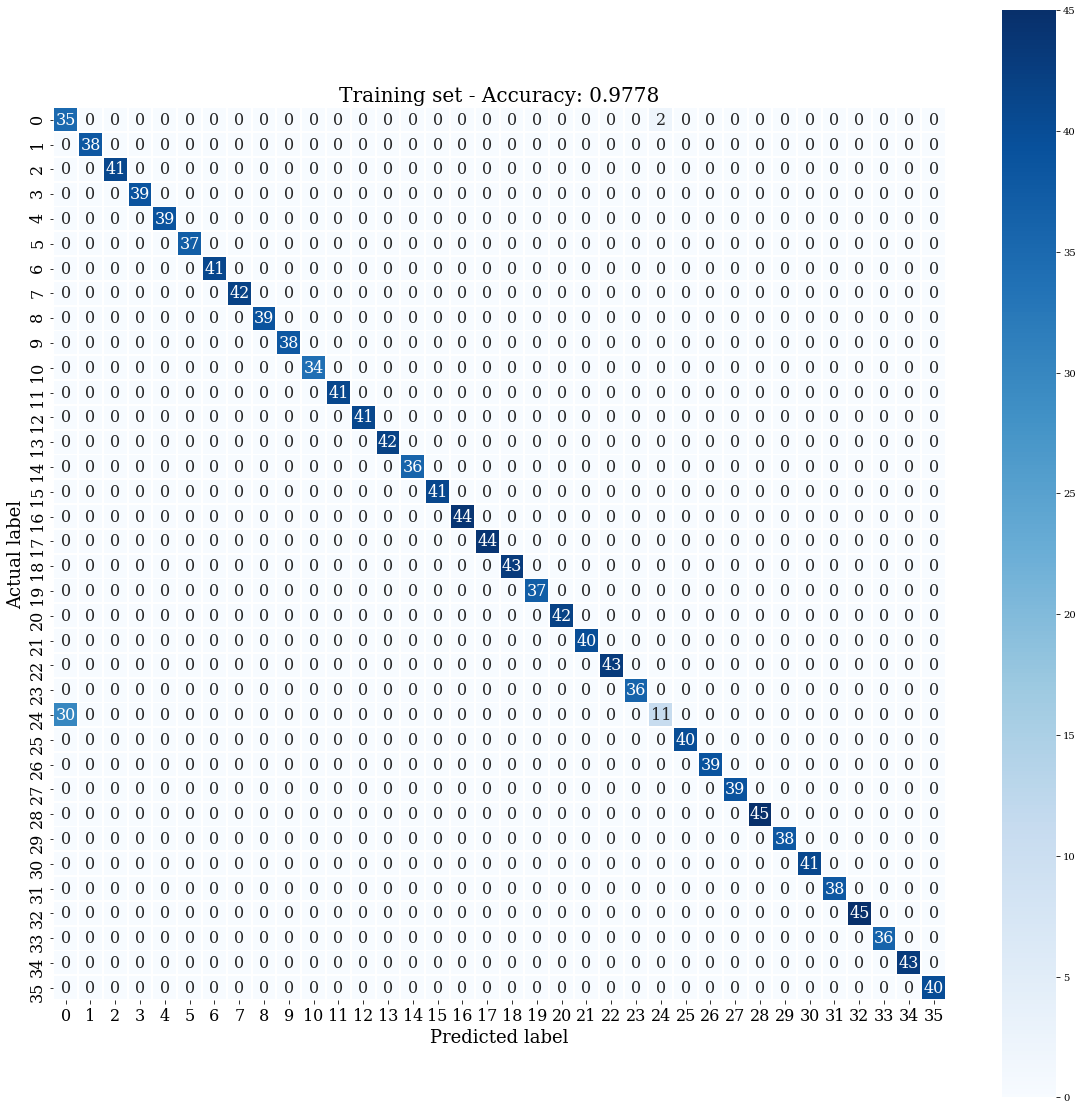

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

predict = cnn.predict(train_x)
predictions = [np.argmax(one_hot)for one_hot in predict]

cm = confusion_matrix(sort_train_label, predictions)

plt.figure(figsize=(20,20))
plt.title('Training set - Accuracy: %0.4f' %(train_acc), size = 20)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Blues',annot_kws={"size": 16})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

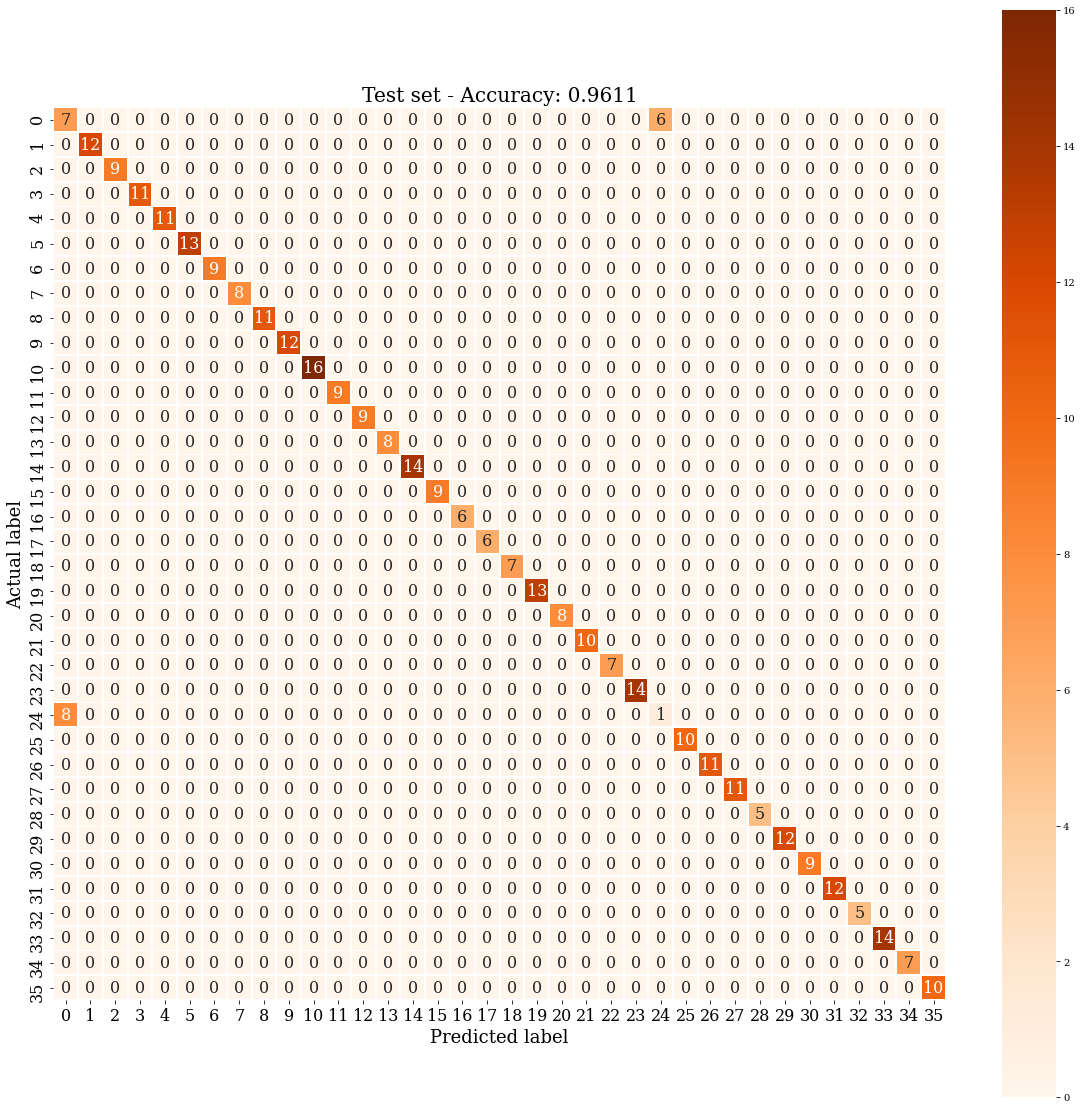

In [19]:
predict = cnn.predict(test_x)
predictions = [np.argmax(one_hot)for one_hot in predict]

cm = confusion_matrix(sort_test_label, predictions)
plt.figure(figsize=(20,20))
plt.title('Test set - Accuracy: %0.4f' %(test_acc), size = 20)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Oranges',annot_kws={"size": 16})
plt.ylabel('Actual label', size = 18)
plt.xlabel('Predicted label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 05. 儲存與讀取模型

In [20]:
cnn.save('cnn_car_number.h5')

from tensorflow.keras.models import load_model
cnn = load_model('cnn_car_number.h5')

## 06. 單筆影像測試

In [21]:
testimg = Image.open(path+"/"+"A_ (2).jpg").convert('L') # 開啟影像

testimg = testimg.resize((im_w, im_h))                  # 改變影像大小
testimg = np.asarray(testimg, dtype="uint8")            # 改變為陣列並為整數型別
testimg = testimg.astype('float32')/255
testimg = np.expand_dims(testimg,-1)                    # 改變影像維度大小
testimg = np.expand_dims(testimg,0) 

predict = cnn.predict(testimg)
predictions = [np.argmax(one_hot)for one_hot in predict]
print(label_name[predictions[0]])

A
